In [0]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


Algorithmic trading has revolutionised the stock market and its surrounding industry. Over 70% of all trades happening in the US right now are being handled by bots[1]. Gone are the days of the packed stock exchange with suited people waving sheets of paper shouting into telephones.
This got me thinking of how I could develop my own algorithm for trading stocks, or at least try to accurately predict them.

’ve learned a lot about neural networks and machine learning over the summer and one of the most recent and applicable ML technologies I learnt about is the LSTM cell

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**The Dataset**

The good thing about stock price history is that it’s basically a well labelled pre formed dataset. After some googling I found a service called AlphaVantage. They offered the daily price history of Google stocks for the past 5 years.

In [0]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

**Data scaling**

Most neural network architectures benefit from scaling the inputs (sometimes also the output). Why? Because most common activation functions of the network’s neurons such as tanh or sigmoid are defined on the [-1, 1] or [0, 1] interval respectively. Nowadays, rectified linear unit (ReLU) activations are commonly used activations which are unbounded on the axis of possible activation values. However, we will scale both the inputs and targets anyway. Scaling can be easily accomplished in Python using sklearn’s MinMaxScaler.

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [0]:
# Getting the inputs and the outputs
x_train = training_set[0:1257]
y_train = training_set[1:1258]

In [0]:
# Reshaping
x_train = np.reshape(x_train, (1257, 1, 1))

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


**The Model**

I started this project only knowing how to write sequential Keras code, but I ended up learning it’s functional API since I wanted a more complex network structure, eventually featuring two inputs with different layer types in each branch.

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer 
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))


In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, batch_size = 32, epochs = 200)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/200





1257/1257 [==============================] - 9s 7ms/step - loss: 0.5158
Epoch 2/200
1257/1257 [==============================] - 0s 228us/step - loss: 0.3942
Epoch 3/200
1257/1257 [==============================] - 0s 184us/step - loss: 0.3009
Epoch 4/200
1257/1257 [==============================] - 0s 182us/step - loss: 0.2318
Epoch 5/200
1257/1257 [==============================] - 0s 173us/step - loss: 0.1814
Epoch 6/200
1257/1257 [==============================] - 0s 186us/step - loss: 0.1462
Epoch 7/200
1257/1257 [==============================] - 0s 170us/step - loss: 0.1214
Epoch 8/200
1257/1257 [==============================] - 0s 193us/step - loss: 0.1047
Epoch 9/200
1257/1257 [==============================] - 0s 215us/step - loss: 0.0936
Epoch 10/200
1257/1257 [==============================] - 0s 186us/step - loss: 0.0866
Epoch 11/200
1257/1257 [===============

In [0]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

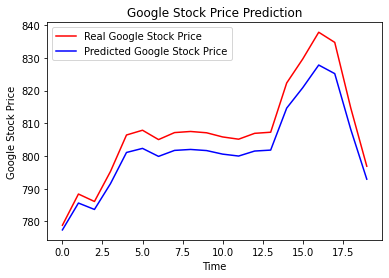

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [0]:
# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regressor.predict(x_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

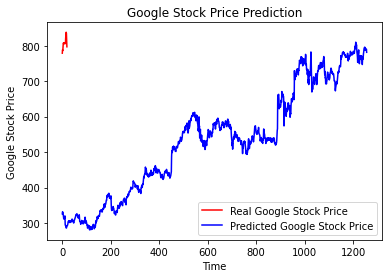

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [0]:
# Evaluating the RNN 
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))